## College Football Win Prediction

Data source: https://www.kaggle.com/datasets/jeffgallini/college-football-attendance-2000-to-2018

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

import re
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

import tensorflow as tf

2025-05-03 09:29:18.613525: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
data = pd.read_csv('CFBeattendance.csv', encoding='latin-1')
data

,Date,Team,Time,Opponent,Rank,Site,TV,Result,Attendance,Current Wins,Current Losses,Stadium Capacity,Fill Rate,New Coach,Tailgating,PRCP,SNOW,SNWD,TMAX,TMIN,Opponent_Rank,Conference,Year,Month,Day
0,9/2/2000,Arkansas,8:00 PM,Southwest Missouri State*,NR,"War Memorial StadiumLittle Rock, AR",Not on TV,W 380,53946,0,0,53727,1.004076,False,False,0.00,0.0,0.0,105,65,NR,SEC,2000,9,2
1,9/16/2000,Arkansas,6:00 PM,Boise State*,NR,"War Memorial StadiumLittle Rock, AR",Not on TV,W 3831,54286,1,0,53727,1.010404,False,False,0.00,0.0,0.0,79,44,NR,SEC,2000,9,16
2,9/23/2000,Arkansas,8:00 PM,Alabama,NR,"Razorback StadiumFayetteville, AR",ESPN2,W 2821,51482,2,0,50019,1.029249,False,False,2.12,0.0,0.0,85,63,NR,SEC,2000,9,23
3,9/30/2000,Arkansas,11:30 AM,No. 25 Georgia,NR,"Razorback StadiumFayetteville, AR",JPS,L 738,51162,3,0,50019,1.022851,False,False,0.00,0.0,0.0,77,45,25,SEC,2000,9,30
4,10/7/2000,Arkansas,6:00 PM,LouisianaMonroe*,NR,"Razorback StadiumFayetteville, AR",Not on TV,W 526,50947,3,1,50019,1.018553,False,False,0.00,0.0,0.0,50,28,NR,SEC,2000,10,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6667,9/22/2018,UTEP,5:30 PM,New Mexico State*,NR,"Sun BowlEl Paso, TX (Battle of I-10)",ESPN3,L 2027,19412,0,3,51500,0.376932,False,False,0.00,0.0,0.0,80,61,NR,CUSA,2018,9,22
6668,10/6/2018,UTEP,5:30 PM,North Texas,NR,"Sun BowlEl Paso, TX",beIN,L 2427,12809,0,5,51500,0.248718,False,False,0.00,0.0,0.0,88,67,NR,CUSA,2018,10,6
6669,10/27/2018,UTEP,5:30 PM,UAB,NR,"Sun BowlEl Paso, TX",ESPN+,L 019,10787,0,7,51500,0.209456,False,False,0.00,0.0,0.0,77,49,NR,CUSA,2018,10,27
6670,11/10/2018,UTEP,1:00 PM,Middle Tennessee,NR,"Sun BowlEl Paso, TX",ESPN+,L 3248,9690,1,8,51500,0.188155,False,False,0.00,0.0,0.0,63,44,NR,CUSA,2018,11,10


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6672 entries, 0 to 6671
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              6672 non-null   object 
 1   Team              6672 non-null   object 
 2   Time              6672 non-null   object 
 3   Opponent          6672 non-null   object 
 4   Rank              6672 non-null   object 
 5   Site              6672 non-null   object 
 6   TV                6672 non-null   object 
 7   Result            6672 non-null   object 
 8   Attendance        6672 non-null   int64  
 9   Current Wins      6672 non-null   int64  
 10  Current Losses    6672 non-null   int64  
 11  Stadium Capacity  6672 non-null   int64  
 12  Fill Rate         6672 non-null   float64
 13  New Coach         6672 non-null   bool   
 14  Tailgating        6672 non-null   bool   
 15  PRCP              6672 non-null   float64
 16  SNOW              6672 non-null   float64


### Preprocessing

In [4]:
df = data.copy()

In [5]:
features_to_drop = ['Date', 'Site', 'Team', 'Opponent']

df.drop(features_to_drop, axis=1, inplace=True)

#### Missing values

In [6]:
df.isna().sum()

Time                0
Rank                0
TV                  0
Result              0
Attendance          0
Current Wins        0
Current Losses      0
Stadium Capacity    0
Fill Rate           0
New Coach           0
Tailgating          0
PRCP                0
SNOW                0
SNWD                0
TMAX                0
TMIN                0
Opponent_Rank       0
Conference          0
Year                0
Month               0
Day                 0
dtype: int64

#### Encoding

In [7]:
df.dtypes

Time                 object
Rank                 object
TV                   object
Result               object
Attendance            int64
Current Wins          int64
Current Losses        int64
Stadium Capacity      int64
Fill Rate           float64
New Coach              bool
Tailgating             bool
PRCP                float64
SNOW                float64
SNWD                float64
TMAX                  int64
TMIN                  int64
Opponent_Rank        object
Conference           object
Year                  int64
Month                 int64
Day                   int64
dtype: object

In [8]:
categorical_features = df.dtypes[(df.dtypes == 'object')].index.values
categorical_features

array(['Time', 'Rank', 'TV', 'Result', 'Opponent_Rank', 'Conference'],
      dtype=object)

In [9]:
def get_uniques(df, columns):
    uniques = {column: len(df[column].unique()) for column in columns}
    return uniques

In [10]:
get_uniques(df, categorical_features)

{'Time': 69,
 'Rank': 26,
 'TV': 245,
 'Result': 2176,
 'Opponent_Rank': 26,
 'Conference': 14}

In [11]:
nominal_features = ['Conference']

ordinal_features = ['Time', 'Rank', 'Opponent_Rank']

binary_features = ['TV', 'New Coach', 'Tailgating']

#### Binary Encoding

In [12]:
df['TV'].value_counts()

TV
Not on TV                              1317
ESPN                                    508
ESPN2                                   460
ABC                                     453
FSN                                     403
                                       ... 
FSSW PPV                                  1
ESPN3, WAC Sports Network                 1
KJZZ, Oceanic PPV, KFVE (delayed)         1
ESPN2 Oceanic PPV, KFVE (Simulcast)       1
Versus/CSTV/mtn                           1
Name: count, Length: 245, dtype: int64

In [13]:
df['TV'] = df['TV'].apply(lambda x: 0 if x == 'Not on TV' else 1)

In [14]:
df['New Coach'] = df['New Coach'].astype(int)
df['Tailgating'] = df['Tailgating'].astype(int)

In [15]:
df

,Time,Rank,TV,Result,Attendance,Current Wins,Current Losses,Stadium Capacity,Fill Rate,New Coach,Tailgating,PRCP,SNOW,SNWD,TMAX,TMIN,Opponent_Rank,Conference,Year,Month,Day
0,8:00 PM,NR,0,W 380,53946,0,0,53727,1.004076,0,0,0.00,0.0,0.0,105,65,NR,SEC,2000,9,2
1,6:00 PM,NR,0,W 3831,54286,1,0,53727,1.010404,0,0,0.00,0.0,0.0,79,44,NR,SEC,2000,9,16
2,8:00 PM,NR,1,W 2821,51482,2,0,50019,1.029249,0,0,2.12,0.0,0.0,85,63,NR,SEC,2000,9,23
3,11:30 AM,NR,1,L 738,51162,3,0,50019,1.022851,0,0,0.00,0.0,0.0,77,45,25,SEC,2000,9,30
4,6:00 PM,NR,0,W 526,50947,3,1,50019,1.018553,0,0,0.00,0.0,0.0,50,28,NR,SEC,2000,10,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6667,5:30 PM,NR,1,L 2027,19412,0,3,51500,0.376932,0,0,0.00,0.0,0.0,80,61,NR,CUSA,2018,9,22
6668,5:30 PM,NR,1,L 2427,12809,0,5,51500,0.248718,0,0,0.00,0.0,0.0,88,67,NR,CUSA,2018,10,6
6669,5:30 PM,NR,1,L 019,10787,0,7,51500,0.209456,0,0,0.00,0.0,0.0,77,49,NR,CUSA,2018,10,27
6670,1:00 PM,NR,1,L 3248,9690,1,8,51500,0.188155,0,0,0.00,0.0,0.0,63,44,NR,CUSA,2018,11,10


#### Ordinal Encoding

In [16]:
df['Rank'].unique()

array(['NR', '14', '7', '11', '17', '15', '13', '5', '20', '10', '21',
       '19', '12', '8', '6', '18', '24', '16', '22', '25', '23', '9', '4',
       '2', '3', '1'], dtype=object)

In [17]:
df['Rank'] = df['Rank'].apply(lambda x: 26 if x == 'NR' else int(x))

In [18]:
df['Opponent_Rank'].unique()

array(['NR', '25', '24', '9', '17', '18', '10', '14', '21', '6', '13',
       '23', '20', '1', '15', '2', '8', '7', '12', '19', '4', '5', '16',
       '22', '3', '11'], dtype=object)

In [19]:
df['Opponent_Rank'] = df['Opponent_Rank'].apply(lambda x: 26 if x == 'NR' else int(x))

In [20]:
time_ordering = sorted(list(df['Time'].unique()))
time_ordering

['10:00 AM',
 '10:30 AM',
 '11:00 AM',
 '11:05 AM',
 '11:10 AM',
 '11:21 AM',
 '11:30 AM',
 '11:40 AM',
 '12:00 PM',
 '12:05 PM',
 '12:10 PM',
 '12:15 PM',
 '12:20 PM',
 '12:30 PM',
 '12:35 PM',
 '12:45 PM',
 '1:00 PM',
 '1:05 PM',
 '1:10 PM',
 '1:15 PM',
 '1:30 PM',
 '1:45 PM',
 '2:00 PM',
 '2:05 PM',
 '2:15 PM',
 '2:30 PM',
 '2:35 PM',
 '2:45 PM',
 '3:00 PM',
 '3:05 PM',
 '3:15 PM',
 '3:30 PM',
 '3:36 PM',
 '3:40 PM',
 '3:45 PM',
 '4:00 PM',
 '4:05 PM',
 '4:15 PM',
 '4:20 PM',
 '4:30 PM',
 '4:45 PM',
 '5:00 PM',
 '5:05 PM',
 '5:10 PM',
 '5:15 PM',
 '5:30 PM',
 '5:45 PM',
 '6:00 PM',
 '6:05 PM',
 '6:10 PM',
 '6:15 PM',
 '6:30 PM',
 '6:35 PM',
 '6:45 PM',
 '6:50 PM',
 '7:00 PM',
 '7:05 PM',
 '7:06 PM',
 '7:15 PM',
 '7:20 PM',
 '7:30 PM',
 '7:35 PM',
 '7:45 PM',
 '8:00 PM',
 '8:04 PM',
 '8:05 PM',
 '8:15 PM',
 '8:30 PM',
 '9:00 PM']

In [21]:
df['Time'] = df['Time'].apply(lambda x: time_ordering.index(x))

In [22]:
df

,Time,Rank,TV,Result,Attendance,Current Wins,Current Losses,Stadium Capacity,Fill Rate,New Coach,Tailgating,PRCP,SNOW,SNWD,TMAX,TMIN,Opponent_Rank,Conference,Year,Month,Day
0,63,26,0,W 380,53946,0,0,53727,1.004076,0,0,0.00,0.0,0.0,105,65,26,SEC,2000,9,2
1,47,26,0,W 3831,54286,1,0,53727,1.010404,0,0,0.00,0.0,0.0,79,44,26,SEC,2000,9,16
2,63,26,1,W 2821,51482,2,0,50019,1.029249,0,0,2.12,0.0,0.0,85,63,26,SEC,2000,9,23
3,6,26,1,L 738,51162,3,0,50019,1.022851,0,0,0.00,0.0,0.0,77,45,25,SEC,2000,9,30
4,47,26,0,W 526,50947,3,1,50019,1.018553,0,0,0.00,0.0,0.0,50,28,26,SEC,2000,10,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6667,45,26,1,L 2027,19412,0,3,51500,0.376932,0,0,0.00,0.0,0.0,80,61,26,CUSA,2018,9,22
6668,45,26,1,L 2427,12809,0,5,51500,0.248718,0,0,0.00,0.0,0.0,88,67,26,CUSA,2018,10,6
6669,45,26,1,L 019,10787,0,7,51500,0.209456,0,0,0.00,0.0,0.0,77,49,26,CUSA,2018,10,27
6670,16,26,1,L 3248,9690,1,8,51500,0.188155,0,0,0.00,0.0,0.0,63,44,26,CUSA,2018,11,10


#### Nominal Encoding

In [23]:
df['Conference'].unique()

array(['SEC', 'Big-12', 'WAC', 'MWC', 'Independent', 'ACC', 'Pac-12',
       'Big-10', 'Mid-American', 'CUSA', 'AAC', 'Big East', 'Sun Belt',
       'FCS'], dtype=object)

In [24]:
def onehot_encode(df, column):
    dummies = pd.get_dummies(df[column])
    df = pd.concat([df, dummies], axis=1)
    df = df.drop(column, axis=1)
    return df

In [25]:
df = onehot_encode(df, 'Conference')
df

,Time,Rank,TV,Result,Attendance,Current Wins,Current Losses,Stadium Capacity,Fill Rate,New Coach,Tailgating,PRCP,SNOW,SNWD,TMAX,TMIN,Opponent_Rank,Year,Month,Day,AAC,ACC,Big East,Big-10,Big-12,CUSA,FCS,Independent,MWC,Mid-American,Pac-12,SEC,Sun Belt,WAC
0,63,26,0,W 380,53946,0,0,53727,1.004076,0,0,0.00,0.0,0.0,105,65,26,2000,9,2,False,False,False,False,False,False,False,False,False,False,False,True,False,False
1,47,26,0,W 3831,54286,1,0,53727,1.010404,0,0,0.00,0.0,0.0,79,44,26,2000,9,16,False,False,False,False,False,False,False,False,False,False,False,True,False,False
2,63,26,1,W 2821,51482,2,0,50019,1.029249,0,0,2.12,0.0,0.0,85,63,26,2000,9,23,False,False,False,False,False,False,False,False,False,False,False,True,False,False
3,6,26,1,L 738,51162,3,0,50019,1.022851,0,0,0.00,0.0,0.0,77,45,25,2000,9,30,False,False,False,False,False,False,False,False,False,False,False,True,False,False
4,47,26,0,W 526,50947,3,1,50019,1.018553,0,0,0.00,0.0,0.0,50,28,26,2000,10,7,False,False,False,False,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6667,45,26,1,L 2027,19412,0,3,51500,0.376932,0,0,0.00,0.0,0.0,80,61,26,2018,9,22,False,False,False,False,False,True,False,False,False,False,False,False,False,False
6668,45,26,1,L 2427,12809,0,5,51500,0.248718,0,0,0.00,0.0,0.0,88,67,26,2018,10,6,False,False,False,False,False,True,False,False,False,False,False,False,False,False
6669,45,26,1,L 019,10787,0,7,51500,0.209456,0,0,0.00,0.0,0.0,77,49,26,2018,10,27,False,False,False,False,False,True,False,False,False,False,False,False,False,False
6670,16,26,1,L 3248,9690,1,8,51500,0.188155,0,0,0.00,0.0,0.0,63,44,26,2018,11,10,False,False,False,False,False,True,False,False,False,False,False,False,False,False


#### Label Encoding

In [26]:
df = df.drop([4355, 5442, 5449, 5456], axis=0)

In [27]:
y = df['Result'].copy()
X = df.drop('Result', axis=1).copy()

In [28]:
y = y.apply(lambda x: re.search(r'^[^\s]*', x).group(0))

In [29]:
y.unique()

array(['W', 'L'], dtype=object)

In [30]:
y[(y == 'NC') | (y == 'White') | (y == 'Blue')]

Series([], Name: Result, dtype: object)

In [31]:
label_encoder = LabelEncoder()

y = label_encoder.fit_transform(y)
y_mappings = {index: value for index, value in enumerate(label_encoder.classes_)}

In [32]:
y_mappings

{0: 'L', 1: 'W'}

#### Scaling

In [33]:
y

array([1, 1, 1, ..., 0, 0, 0])

In [34]:
X

,Time,Rank,TV,Attendance,Current Wins,Current Losses,Stadium Capacity,Fill Rate,New Coach,Tailgating,PRCP,SNOW,SNWD,TMAX,TMIN,Opponent_Rank,Year,Month,Day,AAC,ACC,Big East,Big-10,Big-12,CUSA,FCS,Independent,MWC,Mid-American,Pac-12,SEC,Sun Belt,WAC
0,63,26,0,53946,0,0,53727,1.004076,0,0,0.00,0.0,0.0,105,65,26,2000,9,2,False,False,False,False,False,False,False,False,False,False,False,True,False,False
1,47,26,0,54286,1,0,53727,1.010404,0,0,0.00,0.0,0.0,79,44,26,2000,9,16,False,False,False,False,False,False,False,False,False,False,False,True,False,False
2,63,26,1,51482,2,0,50019,1.029249,0,0,2.12,0.0,0.0,85,63,26,2000,9,23,False,False,False,False,False,False,False,False,False,False,False,True,False,False
3,6,26,1,51162,3,0,50019,1.022851,0,0,0.00,0.0,0.0,77,45,25,2000,9,30,False,False,False,False,False,False,False,False,False,False,False,True,False,False
4,47,26,0,50947,3,1,50019,1.018553,0,0,0.00,0.0,0.0,50,28,26,2000,10,7,False,False,False,False,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6667,45,26,1,19412,0,3,51500,0.376932,0,0,0.00,0.0,0.0,80,61,26,2018,9,22,False,False,False,False,False,True,False,False,False,False,False,False,False,False
6668,45,26,1,12809,0,5,51500,0.248718,0,0,0.00,0.0,0.0,88,67,26,2018,10,6,False,False,False,False,False,True,False,False,False,False,False,False,False,False
6669,45,26,1,10787,0,7,51500,0.209456,0,0,0.00,0.0,0.0,77,49,26,2018,10,27,False,False,False,False,False,True,False,False,False,False,False,False,False,False
6670,16,26,1,9690,1,8,51500,0.188155,0,0,0.00,0.0,0.0,63,44,26,2018,11,10,False,False,False,False,False,True,False,False,False,False,False,False,False,False


In [35]:
scaler = MinMaxScaler()

X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X

,Time,Rank,TV,Attendance,Current Wins,Current Losses,Stadium Capacity,Fill Rate,New Coach,Tailgating,PRCP,SNOW,SNWD,TMAX,TMIN,Opponent_Rank,Year,Month,Day,AAC,ACC,Big East,Big-10,Big-12,CUSA,FCS,Independent,MWC,Mid-American,Pac-12,SEC,Sun Belt,WAC
0,0.926471,1.0,0.0,0.475769,0.000000,0.000000,0.406803,0.700775,0.0,0.0,0.000000,0.0,0.0,0.934783,0.631068,1.00,0.0,0.727273,0.033333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.691176,1.0,0.0,0.478899,0.083333,0.000000,0.406803,0.705510,0.0,0.0,0.000000,0.0,0.0,0.652174,0.427184,1.00,0.0,0.727273,0.500000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.926471,1.0,1.0,0.453085,0.166667,0.000000,0.365732,0.719610,0.0,0.0,0.328682,0.0,0.0,0.717391,0.611650,1.00,0.0,0.727273,0.733333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.088235,1.0,1.0,0.450139,0.250000,0.000000,0.365732,0.714823,0.0,0.0,0.000000,0.0,0.0,0.630435,0.436893,0.96,0.0,0.727273,0.966667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.691176,1.0,0.0,0.448160,0.250000,0.090909,0.365732,0.711607,0.0,0.0,0.000000,0.0,0.0,0.336957,0.271845,1.00,0.0,0.818182,0.200000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6663,0.661765,1.0,1.0,0.157841,0.000000,0.272727,0.382136,0.231535,0.0,0.0,0.000000,0.0,0.0,0.663043,0.592233,1.00,1.0,0.727273,0.700000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6664,0.661765,1.0,1.0,0.097052,0.000000,0.454545,0.382136,0.135604,0.0,0.0,0.000000,0.0,0.0,0.750000,0.650485,1.00,1.0,0.818182,0.166667,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6665,0.661765,1.0,1.0,0.078437,0.000000,0.636364,0.382136,0.106227,0.0,0.0,0.000000,0.0,0.0,0.630435,0.475728,1.00,1.0,0.818182,0.866667,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6666,0.235294,1.0,1.0,0.068338,0.083333,0.727273,0.382136,0.090289,0.0,0.0,0.000000,0.0,0.0,0.478261,0.427184,1.00,1.0,0.909091,0.300000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Training

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

In [42]:
inputs = tf.keras.Input(shape=(33, ))
x = tf.keras.layers.Dense(16, activation='relu')(inputs)
x = tf.keras.layers.Dense(16, activation='relu')(x)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

metrics = [
    tf.keras.metrics.BinaryAccuracy(name='acc'),
    tf.keras.metrics.AUC(name='auc')
]

model.compile(
    optimizer=optimizer,
    loss = 'binary_crossentropy',
    metrics=metrics
)

batch_size = 32
epochs = 41

history = model.fit(
    X_train, 
    y_train,
    validation_split=0.2,
    batch_size=batch_size,
    epochs=epochs
)

Epoch 1/41
117/117 [==============================] - 2s 5ms/step - loss: 0.6463 - acc: 0.6402 - auc: 0.5706 - val_loss: 0.6310 - val_acc: 0.6413 - val_auc: 0.6516
Epoch 2/41
117/117 [==============================] - 1s 8ms/step - loss: 0.6240 - acc: 0.6496 - auc: 0.6595 - val_loss: 0.6085 - val_acc: 0.6660 - val_auc: 0.6984
Epoch 3/41
117/117 [==============================] - 1s 6ms/step - loss: 0.6049 - acc: 0.6718 - auc: 0.6897 - val_loss: 0.5862 - val_acc: 0.7034 - val_auc: 0.7281
Epoch 4/41
117/117 [==============================] - 1s 6ms/step - loss: 0.5903 - acc: 0.6847 - auc: 0.7079 - val_loss: 0.5770 - val_acc: 0.7195 - val_auc: 0.7450
Epoch 5/41
117/117 [==============================] - 1s 5ms/step - loss: 0.5816 - acc: 0.6917 - auc: 0.7180 - val_loss: 0.5679 - val_acc: 0.7066 - val_auc: 0.7495
Epoch 6/41
117/117 [==============================] - 0s 3ms/step - loss: 0.5768 - acc: 0.7018 - auc: 0.7248 - val_loss: 0.5579 - val_acc: 0.7173 - val_auc: 0.7555
Epoch 7/41
117/1

### Results

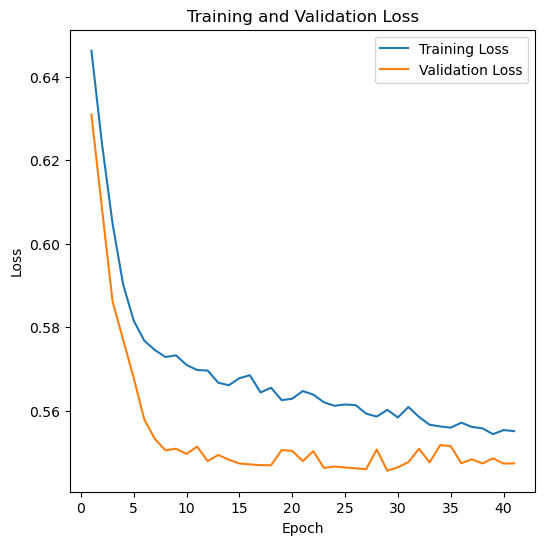

In [43]:
plt.figure(figsize=(6,6))
epochs_range = range(1, epochs+1)
train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs_range, train_loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')

plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [44]:
model.evaluate(X_test, y_test)

63/63 [==============================] - 0s 3ms/step - loss: 0.5787 - acc: 0.7031 - auc: 0.7259


[0.5787449479103088, 0.7031484246253967, 0.7259405851364136]